In [1]:
using Printf
using NPZ
using CairoMakie
using DelimitedFiles
using CubicSplines

using MicroMagnetic
#MicroMagnetic.cuda_using_double(true);

In this example, we will compute the energy barrier of a skyrmion collapse into the ferromagnetic state using the NEB method.
Firstly, we create a create_sim method to describe the studied system. For example, the system is a thin film (120x120x2 nm^3)
with periodic boundary conditions, and three energies are considered.

In [2]:
function create_sim(init_m_fun=(0,0,1))
    mesh =  FDMesh(nx=60, ny=60, nz=1, dx=2e-9, dy=2e-9, dz=2e-9, pbc="xy")
    sim = Sim(mesh, name="neb", driver="SD")
    set_Ms(sim, 3.84e5)

    init_m0(sim, init_m_fun)

    add_exch(sim, 3.25e-12)
    add_dmi(sim, 5.83e-4)
    add_zeeman(sim, (0, 0, 120*mT))

    return sim
end

create_sim (generic function with 2 methods)

In this method, we will obtain a magnetic skyrmion. The skyrmion state is save as 'skx.npy'.

In [3]:
function relax_skx()
    function m0_fun_skx(i,j,k, dx, dy, dz)
        r2 = (i-30)^2 + (j-30)^2
        if r2 < 10^2
          return (0.01, 0, -1)
        end
        return (0,0,1)
    end

    sim = create_sim(m0_fun_skx)
    relax(sim, maxsteps=2000, stopping_dmdt=0.01)
    npzwrite("skx.npy", Array(sim.spin))

    save_vtk(sim, "skx")
end

relax_skx (generic function with 1 method)

We will use this method the plot the magnetization.

In [4]:
function plot_spatial_m(m; nx=60, ny=60, filename="")

  points = [Point3f(i, j, 0) for i in 1:2:nx for j in 1:2:ny]

  m = reshape(m, 3, nx, ny)
  mf = [Vec3f(m[1, i, j], m[2, i,j], m[3, i,j]) for i in 1:2:nx for j in 1:2:ny]
  mz = [m[3, i, j]  for i in 1:2:nx for j in 1:2:ny]

  fig = Figure(resolution = (800, 800))
  ax = Axis(fig[1, 1], backgroundcolor = "white")

  arrows!(ax, points, mf, fxaa=true, # turn on anti-aliasing
          color = vec(mz), linewidth = 0.5, arrowsize = 1, lengthscale = 1,
          align = :center
      )

  if length(filename)>0
    save(filename*".png", fig)
  end

  return fig

end

plot_spatial_m (generic function with 1 method)

We will invoke the relax_skx method to obtain a magnetic skyrmion state.

In [5]:
relax_skx()

[ Info: MicroSim has been created.
[ Info: Exchange has been added.
[ Info: Bulk DMI has been added.
[ Info: Static Zeeman has been added.
[ Info: Running Driver : MicroMagnetic.EnergyMinimization{Float64}.
[ Info: step =    0  step_size=9.049774e-16  max_dmdt=1.112722e+04
[ Info: step =    1  step_size=2.042164e-12  max_dmdt=1.092194e+04
[ Info: step =    2  step_size=5.766994e-13  max_dmdt=2.521828e+04
[ Info: step =    3  step_size=5.309641e-12  max_dmdt=1.741307e+04
[ Info: step =    4  step_size=1.092790e-12  max_dmdt=6.458442e+04
[ Info: step =    5  step_size=6.678002e-13  max_dmdt=4.755981e+04
[ Info: step =    6  step_size=3.897512e-13  max_dmdt=3.990784e+04
[ Info: step =    7  step_size=3.799675e-13  max_dmdt=7.023159e+03
[ Info: step =    8  step_size=4.307749e-13  max_dmdt=4.669965e+03
[ Info: step =    9  step_size=5.976828e-12  max_dmdt=4.163099e+03
[ Info: step =   10  step_size=3.030012e-12  max_dmdt=7.248001e+03
[ Info: step =   11  step_size=1.490474e-12  max_dmdt=1.

1-element Vector{String}:
 "skx.vts"

We plot the skyrmion using 3D arrows.

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/eziUH/src/scenes.jl:227


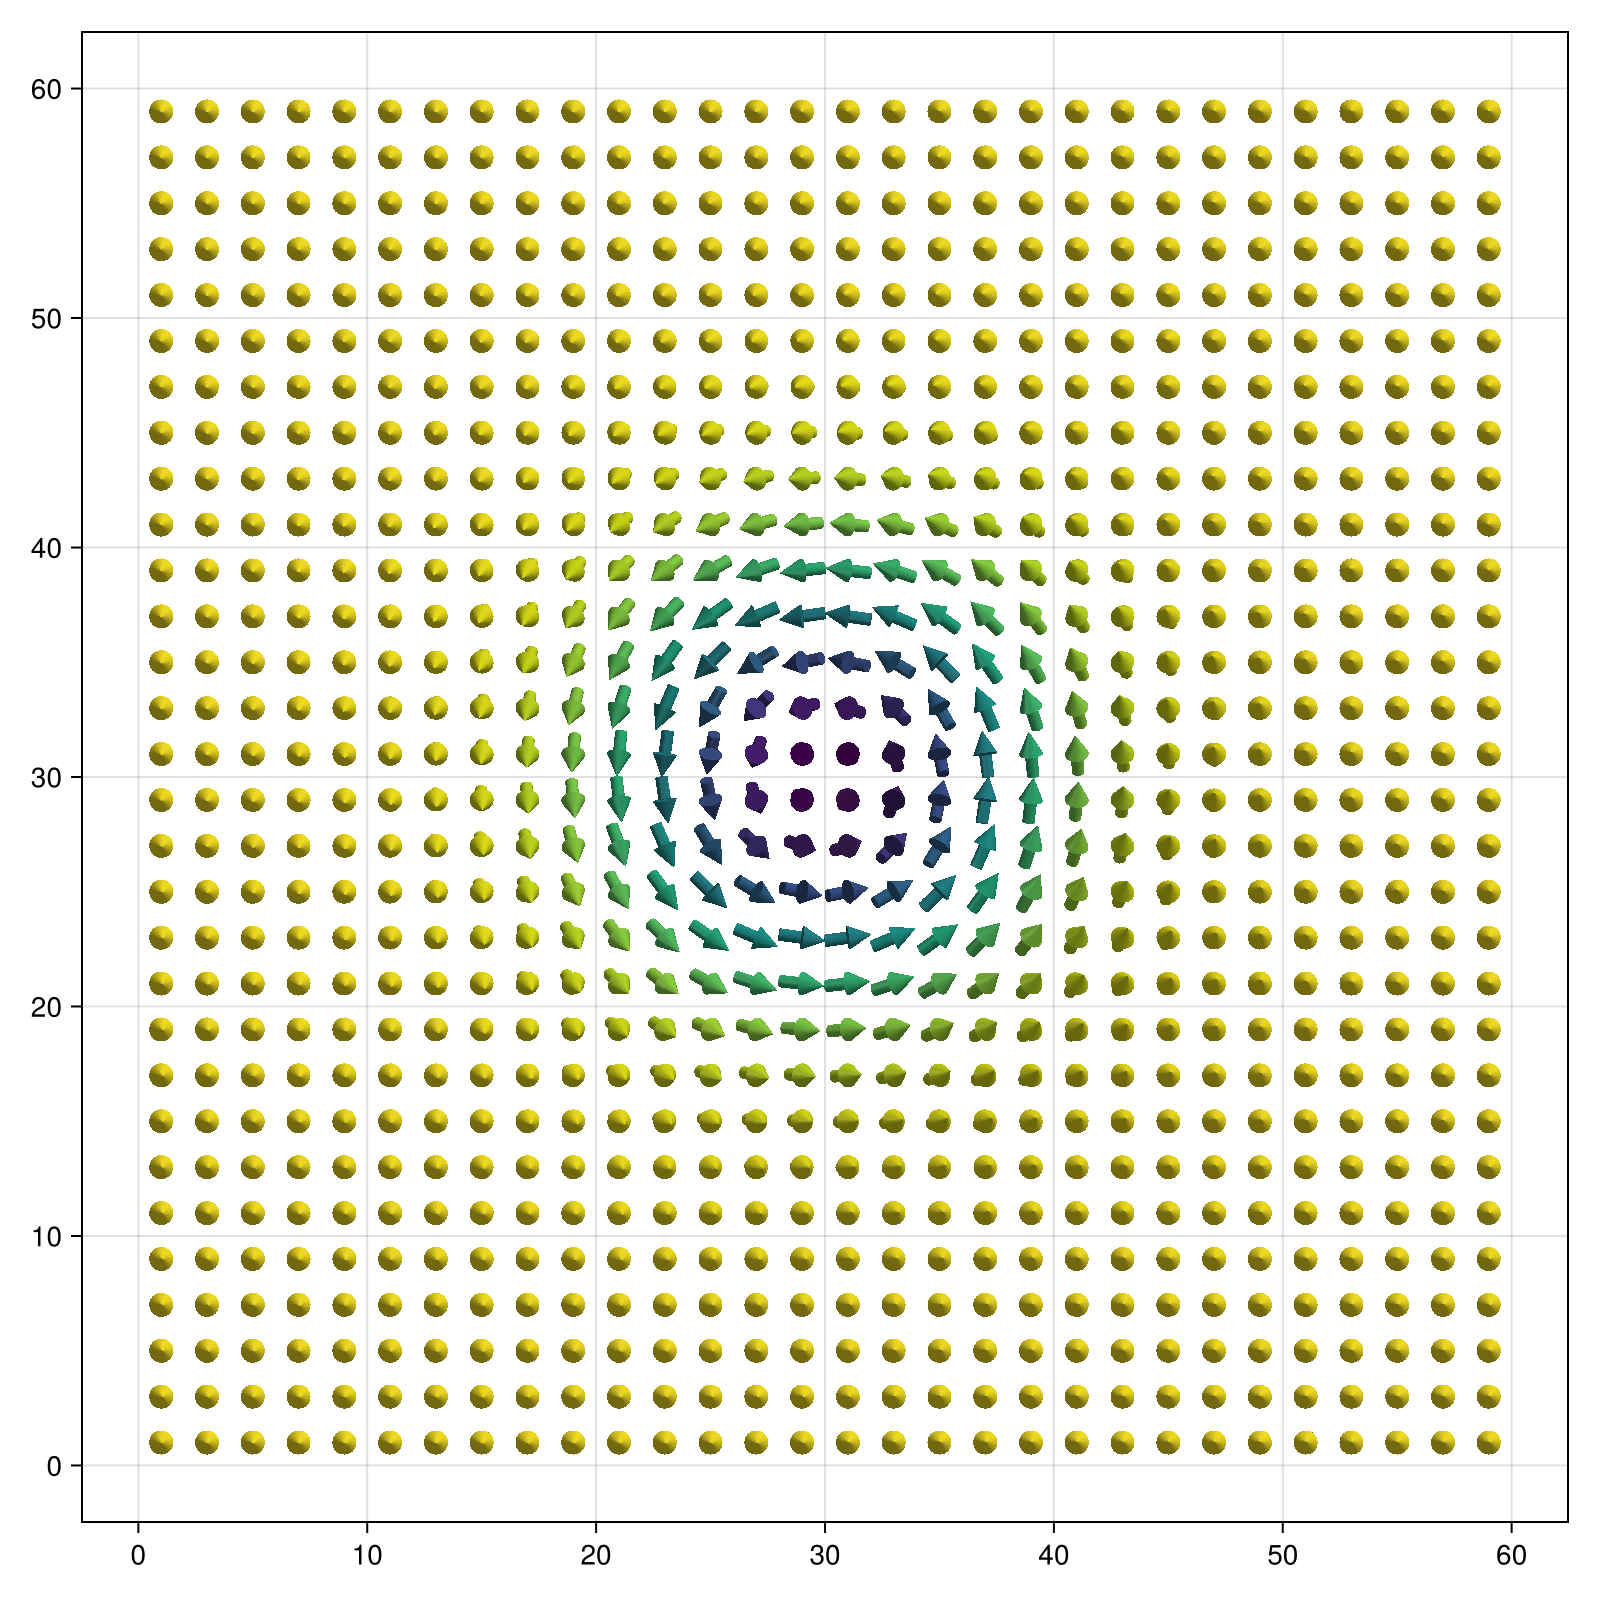

In [6]:
plot_spatial_m(npzread("skx.npy"))

To use the NEB, we use the create_sim method to create a Sim instance.

In [7]:
sim = create_sim()

[ Info: MicroSim has been created.
[ Info: Exchange has been added.
[ Info: Bulk DMI has been added.
[ Info: Static Zeeman has been added.


MicroMagnetic.MicroSim{Float64}(0.0, FDMesh{Float64}(2.0e-9, 2.0e-9, 2.0e-9, 60, 60, 1, true, true, false, 3600, 8.000000000000002e-27, Int32[60 1 … 3598 3599; 2 3 … 3600 3541; … ; -1 -1 … -1 -1; -1 -1 … -1 -1]), MicroMagnetic.EnergyMinimization{Float64}([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 0.0, 1.0, 1.0e-10, 0), MicroMagnetic.DataSaver("neb_sd.txt", false, 0.0, 0, Any[MicroMagnetic.SaverItem("step", "", MicroMagnetic.var"#76#78"()), MicroMagnetic.SaverItem("E_total", "J", MicroMagnetic.var"#80#81"()), MicroMagnetic.SaverItem(("m_x", "m_y", "m_z"), ("", "", ""), MicroMagnetic.average_m), MicroMagnetic.SaverIte

We need to define the initial and final state, which is stored in the init_images list.
Note that any acceptable object, such as a function, a tuple, or an array, can be used.
Moreover, the init_images list could contain the intermediate state if you have one.

In [8]:
init_images = [npzread("skx.npy"),  (0, 0, 1)]

2-element Vector{Any}:
 [0.0007389439776981228, -0.0007849183753704079, 0.9999994189323023, 0.0007693898600926374, -0.0015706563399029603, 0.9999984705377831, 0.000820662781550303, -0.0023577637382943624, 0.9999968837265212, 0.0008934009176539114  …  0.9999972868608121, -4.915460771754561e-5, 0.0015516198579173899, 0.9999987950290945, -4.7208285637386654e-5, 0.0007755058753700436, 0.9999996981809623, -4.655926753356816e-5, 0.0, 0.9999999989161177]
 (0, 0, 1)

We need an interpolation array to specify how many images will be used in the NEB simulation.
Note the length of the interpolation array is the length of init_images minus one.

In [9]:
interpolation  = [6]

1-element Vector{Int64}:
 6

We create the NEB instance and set the spring_constant.
neb = NEB_GPU(sim, init_images, interpolation; name="skx_fm", driver="LLG")
neb.spring_constant = 1e7

Relax the whole system, uncomment the line 102

In [10]:
if !isfile("skx_fm_energy.txt")
  #relax(neb, stopping_dmdt=0.1, save_vtk_every=1000, maxsteps=5000)
end

After running the simulation, the energy text file ('skx_fm_energy.txt') and the corresponding
distance text file ('skx_fm_distance.txt') are generated.

We define a function to extract the data for plotting.

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/eziUH/src/scenes.jl:227


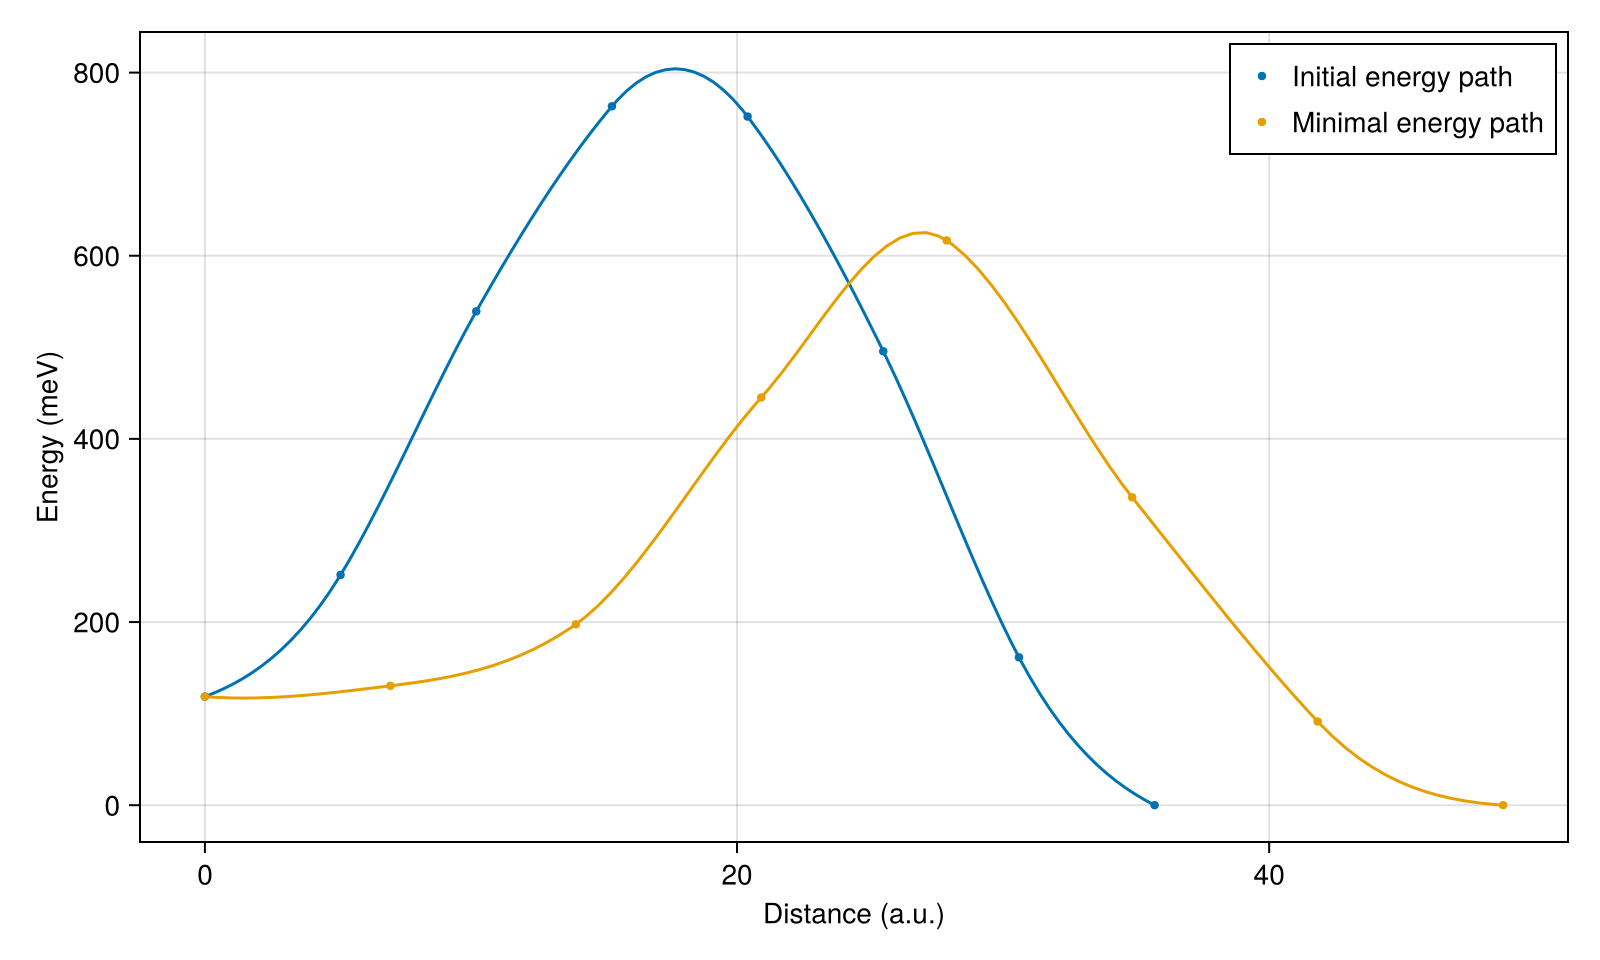

In [11]:
function extract_data(;id=1)
  energy = readdlm("assets/skx_fm_energy.txt", skipstart=2)
  dms = readdlm("assets/skx_fm_distance.txt", skipstart=2)
  xs = zeros(length(dms[1, 1:end]))
  for i=2:length(xs)
    xs[i] = sum(dms[id, 2:i])
  end

  et = energy[id, 2:end]
  e0 = minimum(et)
  energy_eV = (et .- e0) / meV

  spline = CubicSpline(xs, energy_eV)

  xs2 = range(xs[1], xs[end], 100)
  energy2 = spline[xs2]

  return xs, energy_eV, xs2, energy2
end


function plot_m()

  fig = Figure(resolution = (800, 480))
  ax = Axis(fig[1, 1],
      xlabel = "Distance (a.u.)",
      ylabel = "Energy (meV)"
  )

  xs, energy, xs2, energy2 = extract_data(id=1)
  scatter!(ax, xs, energy, markersize = 6, label="Initial energy path")
  lines!(ax, xs2, energy2)

  xs, energy, xs2, energy2 = extract_data(id=500)
  scatter!(ax, xs, energy, markersize = 6, label="Minimal energy path")
  lines!(ax, xs2, energy2)
  #linescatter!(ax, data[:,2]*1e9, data[:,5], markersize = 6)
  #linescatter!(ax, data[:,2]*1e9, data[:,6], markersize = 6)

  axislegend()

  save("energy.png", fig)

  return fig

end

plot_m()

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*